In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
file_path = 'PV_Elec_Gas3.csv'
data = pd.read_csv(file_path)
data.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

In [ ]:
data['Daily_solar_power'] = data['Cumulative_solar_power'].diff().fillna(0)

In [ ]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

,day
0,26
1,27


In [ ]:
X = data[['kWh electricity/day', 'Gas/day', 'day', 'month', 'year']]
y = data['Daily_solar_power']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
def create_time_series(X, y, n_steps):
    Xs, ys = [], []
    for i in range(n_steps, len(X)):
        # Xs gets the input sequence, ys gets the next day's solar power
        Xs.append(X[i-n_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

In [ ]:
n_steps = 3
X_train_ts, y_train_ts = create_time_series(X_train.values, y_train.values, n_steps)
X_val_ts, y_val_ts = create_time_series(X_val.values, y_val.values, n_steps)

In [ ]:
n_train_samples, n_timesteps, n_features = X_train_ts.shape
X_train_ts_reshaped = X_train_ts.reshape(n_train_samples, n_timesteps * n_features)

In [ ]:
n_val_samples = X_val_ts.shape[0]
X_val_ts_reshaped = X_val_ts.reshape(n_val_samples, n_timesteps * n_features)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train_ts_reshaped:

This is the input training data. It contains the features we use to make predictions, such as electricity usage, gas consumption, day, month, and year, all reshaped to fit the model's requirements. The reshaping is done because Random Forest expects a 2D array (samples, features), and we had time series data that needed to be flattened.

y_train_ts:

This is the target (output) training data. In this case, it represents the actual daily solar power generation we are trying to predict. The model will use this data to learn the correct patterns between the input (features) and the output (target).

In [ ]:
model.fit(X_train_ts_reshaped, y_train_ts)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_val = model.predict(X_val_ts_reshaped)

In [ ]:
r2 = r2_score(y_val_ts, y_pred_val)
mae = mean_absolute_error(y_val_ts, y_pred_val)
print(f'R-squared score: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')

R-squared score: 0.6564
Mean Absolute Error: 3.8555


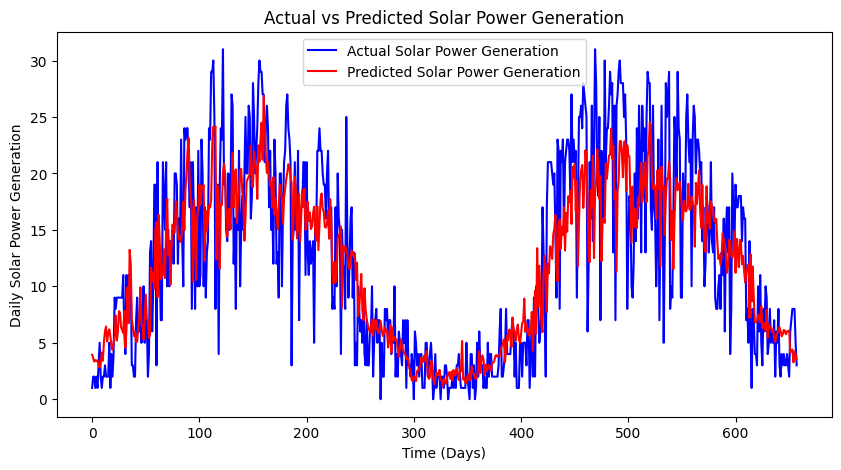

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_val_ts, label='Actual Solar Power Generation', color='b')
plt.plot(y_pred_val, label='Predicted Solar Power Generation', color='r')
plt.xlabel('Time (Days)')
plt.ylabel('Daily Solar Power Generation')
plt.title('Actual vs Predicted Solar Power Generation')
plt.legend()
plt.show()

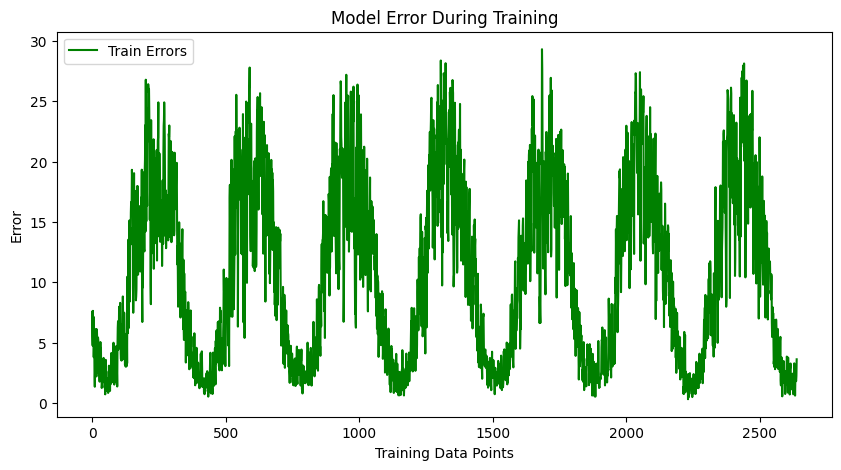

In [ ]:

train_errors = model.predict(X_train_ts_reshaped)
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Train Errors', color='g')
plt.xlabel('Training Data Points')
plt.ylabel('Error')
plt.title('Model Error During Training')
plt.legend()
plt.show()

In [ ]:
cumulative_actual = np.cumsum(y_val_ts)
cumulative_predicted = np.cumsum(y_pred_val)

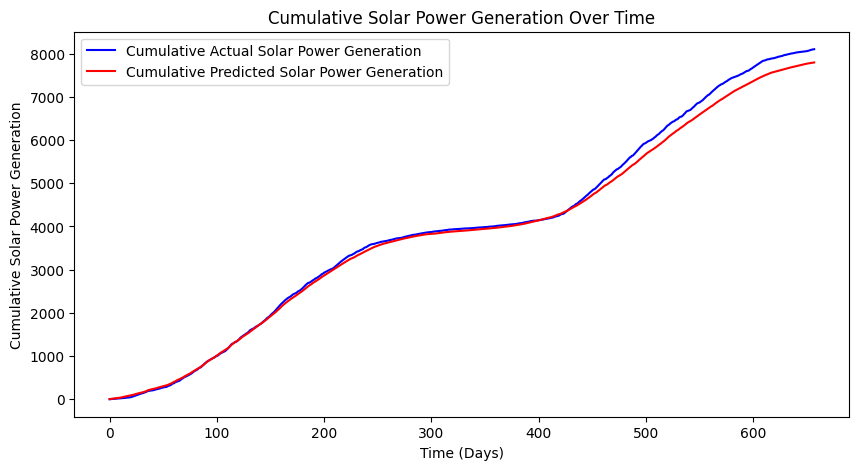

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_actual, label='Cumulative Actual Solar Power Generation', color='b')
plt.plot(cumulative_predicted, label='Cumulative Predicted Solar Power Generation', color='r')
plt.xlabel('Time (Days)')
plt.ylabel('Cumulative Solar Power Generation')
plt.title('Cumulative Solar Power Generation Over Time')
plt.legend()
plt.show()

In [ ]:
accuracy = (1 - np.mean(np.abs((cumulative_actual - cumulative_predicted) / cumulative_actual))) * 100
print(f'Accuracy after one year: {accuracy:.2f}%')


Accuracy after one year: 93.41%
